In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math
from matplotlib_venn import *

plots_dir = 'S:\\lab_winter\\martin\\MJ-20-5\\plots\\' # directory for output plotsfrom matplotlib_venn import *

In [120]:
MolCell_autoreg3_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\old_genesets\\HCT-116\\MolCell_17_autoreg_3+3_genes.xlsx')
CRC_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')

combined_data = pd.read_excel('S:\\lab_winter\\martin\\MED14_PRO-seq_final\\other_final_files\\Fig1_combined_autoreg_KBM7_HCT116_data_TTseq_1h_rawdata.xlsx', index_col=0)

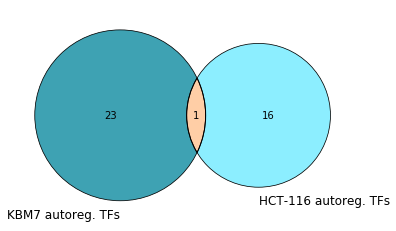

In [36]:
#########################
### make venn diagram ###
#########################

v = venn2((set(CRC_genes.gene_name), set(MolCell_autoreg3_genes.gene_name)), set_labels=('KBM7 autoreg. TFs', 'HCT-116 autoreg. TFs'), alpha=1, set_colors=('#bfbfbf', '#bfbfbf'))
c = venn2_circles((set(CRC_genes.gene_name), set(MolCell_autoreg3_genes.gene_name)), linewidth=.75, linestyle='-')

v.get_patch_by_id('11').set_facecolor('#FFCEA6')
v.get_patch_by_id('11').set_edgecolor('#000000')
#v.get_patch_by_id('11').set_linewidth(.75)
#v.get_patch_by_id('11').set_linestyle('-')

# overlap facecolor grey50
v.get_patch_by_id('10').set_facecolor('#3EA2B3')
v.get_patch_by_id('01').set_facecolor('#8CEEFF')

#plt.savefig(plots_dir + "combined_KBM7_HCT116\\Venn_diagram_KBM7_HCT_autoreg_TF_overlap.pdf", dpi=300)
#plt.savefig(plots_dir + "combined_KBM7_HCT116\\Venn_diagram_KBM7_HCT_autoreg_TF_overlap.png", dpi=300)
plt.show()

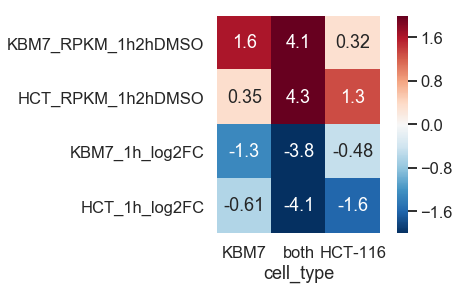

In [105]:
####################
### make heatmap ###
####################

#### now plot heatmap
plt.close('all')
sns.set_style('white')
sns.set_context('talk')
#plt.figure(figsize=(10,2))

g = sns.heatmap(combined_data.groupby(by="cell_type").mean().iloc[[1,2,0],[0,1,3,5]].T, cmap='RdBu_r', vmin=-2, center=0, vmax=2, xticklabels=True, annot=True, square=True)
#g.set_facecolor('xkcd:black')
#g.set_xticklabels(g.get_xticklabels(), fontsize = 10)
#g.patch.set(hatch='/////', edgecolor='black')

plt.savefig(plots_dir + "combined_KBM7_HCT116\\Mean_KBM7_HCT_TTseq_autoregTF_heatmap.pdf", dpi=300)
plt.savefig(plots_dir + "combined_KBM7_HCT116\\Mean_KBM7_HCT_TTseq_autoregTF_heatmap.png", dpi=300)
#plt.show()

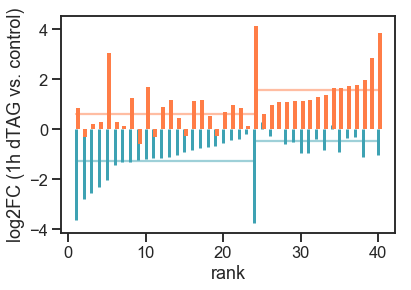

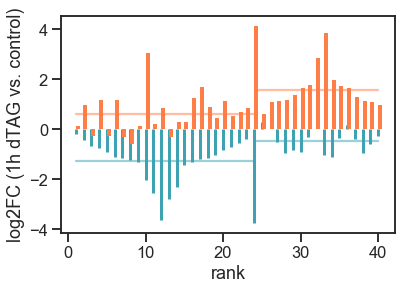

In [189]:
########################
#### make waterfall ####
########################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
#plt.figure(figsize=(9,3))

plt.plot((1,24), (-1.289156,-1.289156), linestyle="-", alpha=0.5, color="#3EA2B3")
plt.plot((1,24), (0.605275,0.605275), linestyle="-", alpha=0.5, color="#FF7D47")

plt.plot((24.25,40), (-0.482751,-0.482751), linestyle="-", alpha=0.5, color="#3EA2B3")
plt.plot((24.25,40), (1.580803,1.580803), linestyle="-", alpha=0.5, color="#FF7D47")

plt.vlines(x=combined_data.rank_asc, ymin=combined_data.KBM7_1h_log2FC, ymax=0, linewidth=3, color='#3EA2B3')
plt.vlines(x=combined_data.rank_asc+0.25, ymin=combined_data.HCT_1h_log2FC*-1, ymax=0, linewidth=4, color='#FF7D47')

plt.xlabel('rank')
plt.ylabel('log2FC (1h dTAG vs. control)')


#plt.savefig(plots_dir + 'combined_KBM7_HCT116\\combined_KBM7_HCT_1h_autoregTF_barplot_ascending_final.pdf', dpi=300)
#plt.savefig(plots_dir + 'combined_KBM7_HCT116\\combined_KBM7_HCT_1h_autoregTF_barplot_ascending_final.png', dpi=300)
plt.show()


########################
#### make waterfall ####
########################

plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
#plt.figure(figsize=(9,3))

plt.plot((1,24), (-1.289156,-1.289156), linestyle="-", alpha=0.5, color="#3EA2B3")
plt.plot((1,24), (0.605275,0.605275), linestyle="-", alpha=0.5, color="#FF7D47")

plt.plot((24.25,40), (-0.482751,-0.482751), linestyle="-", alpha=0.5, color="#3EA2B3")
plt.plot((24.25,40), (1.580803,1.580803), linestyle="-", alpha=0.5, color="#FF7D47")

plt.vlines(x=combined_data.rank_peak, ymin=combined_data.KBM7_1h_log2FC, ymax=0, linewidth=3, color='#3EA2B3')
plt.vlines(x=combined_data.rank_peak+0.25, ymin=combined_data.HCT_1h_log2FC*-1, ymax=0, linewidth=4, color='#FF7D47')

plt.xlabel('rank')
plt.ylabel('log2FC (1h dTAG vs. control)')

#plt.savefig(plots_dir + 'combined_KBM7_HCT116\\combined_KBM7_HCT_1h_autoregTF_barplot_peak_final.pdf', dpi=300)
#plt.savefig(plots_dir + 'combined_KBM7_HCT116\\combined_KBM7_HCT_1h_autoregTF_barplot_peak_final.png', dpi=300)
plt.show()

In [4]:
##### KBM7 1h TT-seq

KBM7_SE_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\SE_464_genes.xlsx')
KBM7_TF_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\TF_53_genes.xlsx')
KBM7_CRC_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')

# DEseq2 dataframe
KBM7_DEseq_TT_1h_df = pd.read_csv('S:\\lab_winter\\martin\\MJ-19-1\\20190418_JaegerWinter2019TTseqKBM7\\DifferentialExpression\\differential.expression.estimates_1h.txt', sep="\t")

##### grep CRC genes #####
# use query to parse geneIDs from the DEseq result table. Need to use the '|'.join construct to use geneIDs as REGEX, where some TRxxx annotations have more than on gene_id
KBM7_CRC_DEseq = KBM7_DEseq_TT_1h_df[KBM7_DEseq_TT_1h_df.gene_id.str.contains('|'.join(KBM7_CRC_genes.geneID.tolist()), na=False)]

##### same for 51 TF SE-genes #####
KBM7_TF_DEseq = KBM7_DEseq_TT_1h_df[KBM7_DEseq_TT_1h_df.gene_id.str.contains('|'.join(KBM7_TF_genes.geneID.tolist()), na=False)]

##### same for 423 SE genes; unfortunately we lose one gene (not contained in the TT-seq annotation) #####
KBM7_SE_DEseq = KBM7_DEseq_TT_1h_df[KBM7_DEseq_TT_1h_df.gene_id.str.contains('|'.join(KBM7_SE_genes.geneID.tolist()), na=False)]

In [5]:
##### HCT116 1h TT-seq
# DEseq2 dataframe
HCT_DEseq_TT_1h_df = pd.read_csv('T:\\groups\\lab_winter\\martin\\MJ-20-5_Cramer_lab\\differential.expression.estimates_1h_HCT116.txt', sep="\t")

##### grep CRC genes #####
MolCell_SE_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\old_genesets\\HCT-116\\MolCell_290_SE_genes.xlsx')
MolCell_TF_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\old_genesets\\HCT-116\\MolCell_23_TF_genes.xlsx')
MolCell_autoreg3_genes = pd.read_excel('S:\lab_winter\martin\Mediator_CRC\\old_genesets\\HCT-116\\MolCell_17_autoreg_3+3_genes.xlsx')

# use query to parse geneIDs from the DEseq result table. Need to use the '|'.join construct to use geneIDs as REGEX, where some TRxxx annotations have more than on gene_id
MolCell_SE_DEseq_1h = HCT_DEseq_TT_1h_df[HCT_DEseq_TT_1h_df.gene_id.str.contains('|'.join(MolCell_SE_genes.geneID.tolist()), na=False)]
MolCell_TF_DEseq_1h = HCT_DEseq_TT_1h_df[HCT_DEseq_TT_1h_df.gene_id.str.contains('|'.join(MolCell_TF_genes.geneID.tolist()), na=False)]
MolCell_autoreg3_DEseq_1h = HCT_DEseq_TT_1h_df[HCT_DEseq_TT_1h_df.gene_id.str.contains('|'.join(MolCell_autoreg3_genes.geneID.tolist()), na=False)]


In [108]:
plot_df = pd.concat([KBM7_DEseq_TT_1h_df, HCT_DEseq_TT_1h_df.iloc[:,[8,9,13]]], axis=1, sort=False).dropna()
plot_df.columns = ['chr', 'strand', 'start', 'end', 'type', 'source', 'length',
       'id', 'KBM7_baseMean', 'KBM7_log2FoldChange', 'KBM7_lfcSE', 'KBM7_stat', 'KBM7_pvalue',
       'KBM7_padj', u'gene_id', u'transcript_id', u'HCT_baseMean', u'HCT_log2FoldChange',
       u'HCT_padj']

HCT_SE_plot_df = plot_df[plot_df.gene_id.str.contains('|'.join(MolCell_SE_genes.geneID.tolist()), na=False)]
HCT_TF_plot_df = plot_df[plot_df.gene_id.str.contains('|'.join(MolCell_TF_genes.geneID.tolist()), na=False)]
HCT_CRC_plot_df = plot_df[plot_df.gene_id.str.contains('|'.join(MolCell_autoreg3_genes.geneID.tolist()), na=False)]
KBM7_SE_plot_df = plot_df[plot_df.gene_id.str.contains('|'.join(KBM7_SE_genes.geneID.tolist()), na=False)]
KBM7_TF_plot_df = plot_df[plot_df.gene_id.str.contains('|'.join(KBM7_TF_genes.geneID.tolist()), na=False)]
KBM7_CRC_plot_df = plot_df[plot_df.gene_id.str.contains('|'.join(KBM7_CRC_genes.geneID.tolist()), na=False)]


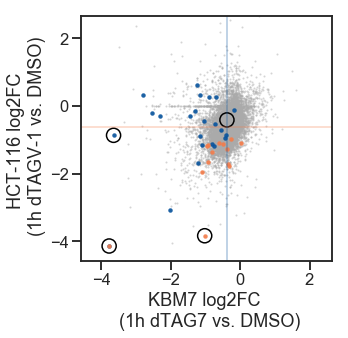

In [118]:
# make scatter plot manually (1h)
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(4.5,4.5))

# for plotting kernel density colormap
#xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
#z = sc.stats.gaussian_kde(xy)(xy)

# plotting all individual
plt.scatter(x=plot_df.KBM7_log2FoldChange, y=plot_df.HCT_log2FoldChange, s=4, c="#aaaaaa", alpha=0.5, vmax=0.0005, cmap="bone_r", edgecolors="black", linewidths=0)

plt.axhline(y=plot_df.HCT_log2FoldChange.median(), color="#f47c4a",alpha=0.25, linewidth=2)
plt.axvline(x=plot_df.KBM7_log2FoldChange.median(), color="#07539d",alpha=0.25, linewidth=2)

#plt.scatter(x=KBM7_SE_plot_df.KBM7_log2FoldChange, y=KBM7_SE_plot_df.HCT_log2FoldChange, s=10, c="#db1d3d", alpha=0.9, vmax=0.0005, cmap="bone_r", edgecolors="black", linewidths=0)
#plt.scatter(x=HCT_SE_plot_df.KBM7_log2FoldChange, y=HCT_SE_plot_df.HCT_log2FoldChange, s=10, c="#0050b3", alpha=0.9, vmax=0.0005, cmap="bone_r", edgecolors="black", linewidths=0)
plt.scatter(x=KBM7_CRC_plot_df.KBM7_log2FoldChange, y=KBM7_CRC_plot_df.HCT_log2FoldChange, s=20, c="#07539d", alpha=0.9, vmax=0.0005, cmap="bone_r", edgecolors="black", linewidths=0)
plt.scatter(x=HCT_CRC_plot_df.KBM7_log2FoldChange, y=HCT_CRC_plot_df.HCT_log2FoldChange, s=20, c="#f47c4a", alpha=0.9, vmax=0.0005, cmap="bone_r", edgecolors="black", linewidths=0)

plt.scatter(x=plot_df[plot_df.gene_id.str.contains('ENSG00000136997', na=False)].KBM7_log2FoldChange, y=plot_df[plot_df.gene_id.str.contains('ENSG00000136997', na=False)].HCT_log2FoldChange, s=200, edgecolors="black", facecolors="none") #myc
plt.scatter(x=plot_df[plot_df.gene_id.str.contains('ENSG00000177426', na=False)].KBM7_log2FoldChange, y=plot_df[plot_df.gene_id.str.contains('ENSG00000177426', na=False)].HCT_log2FoldChange, s=200, edgecolors="black", facecolors="none") #tgif1
plt.scatter(x=plot_df[plot_df.gene_id.str.contains('ENSG00000118513', na=False)].KBM7_log2FoldChange, y=plot_df[plot_df.gene_id.str.contains('ENSG00000118513', na=False)].HCT_log2FoldChange, s=200, edgecolors="black", facecolors="none") #myb
plt.scatter(x=plot_df[plot_df.gene_id.str.contains('ENSG00000115839', na=False)].KBM7_log2FoldChange, y=plot_df[plot_df.gene_id.str.contains('ENSG00000115839', na=False)].HCT_log2FoldChange, s=200, edgecolors="black", facecolors="none") #rab3gap1


# formatting
plt.xlabel('KBM7 log2FC \n (1h dTAG7 vs. DMSO)')
plt.ylabel('HCT-116 log2FC \n (1h dTAGV-1 vs. DMSO)')
plt.xlim(-4.56580008214147,2.65989023772638)
plt.ylim(-4.56580008214147,2.65989023772638)

# save
plt.savefig(plots_dir + 'combined_KBM7_HCT116\\combined_KBM7_HCT_1h_scatterplot_final.pdf', dpi=300)
plt.savefig(plots_dir + 'combined_KBM7_HCT116\\combined_KBM7_HCT_1h_scatterplot_final.png', dpi=300)
plt.show()

In [119]:
KBM7_CRC_plot_df

,chr,strand,start,end,type,source,length,id,KBM7_baseMean,KBM7_log2FoldChange,KBM7_lfcSE,KBM7_stat,KBM7_pvalue,KBM7_padj,gene_id,transcript_id,HCT_baseMean,HCT_log2FoldChange,HCT_padj
TR01431,chr1,-,24899511.0,24965010.0,transcribed_region,REFSEQ_merge,65500.0,TR01431,3928.375,-1.161233,0.137477,-8.446726,2.995864e-17,1.414358e-15,NA ENSG00000020633 ENSG00000278034,NM_001320672 NM_004350 NM_001031680 NR_106789,2221.541667,-0.892994,3.678528e-04
TR01733,chr1,-,92474761.0,92486876.0,transcribed_region,REFSEQ_merge,12116.0,TR01733,2491.625,-2.547204,0.133661,-19.057144,5.731907e-81,4.904721e-78,ENSG00000162676,NM_005263 NM_001127216 NM_001127215,1316.958333,-0.206512,4.507721e-01
TR03426,chr2,-,60451167.0,60553498.0,transcribed_region,REFSEQ_merge,102332.0,TR03426,15079.750,-1.308204,0.096816,-13.512215,1.324740e-41,3.238752e-39,ENSG00000119866,NM_022893 NM_018014 NM_138559,7931.416667,-0.147886,4.857652e-01
TR03887,chr2,-,212999686.0,213151609.0,transcribed_region,REFSEQ_merge,151924.0,TR03887,66108.000,-2.785278,0.145144,-19.189782,4.505297e-82,4.112135e-79,ENSG00000030419,NM_001079526 NM_016260,57295.625000,0.321212,2.234682e-01
TR04019,chr3,+,4979412.0,4985180.0,transcribed_region,REFSEQ_merge,5769.0,TR04019,429.125,-2.017600,0.219356,-9.197855,3.651647e-20,2.202409e-18,ENSG00000134107,NM_003670,479.041667,-3.060000,2.235673e-19
TR04751,chr3,-,18347641.0,18438773.0,transcribed_region,REFSEQ_merge,91133.0,TR04751,47075.500,-2.294134,0.114251,-20.079725,1.110066e-89,1.381629e-86,ENSG00000182568,NM_002971 NM_001131010 NM_001195470,28803.375000,-0.293327,1.959729e-01
TR07290,chr5,-,143277931.0,143435512.0,transcribed_region,REFSEQ_merge,157582.0,TR07290,13576.375,-0.534698,0.102529,-5.215102,1.837161e-07,1.629052e-06,ENSG00000113580 NA,NM_001204262 NM_001204261 NM_001204259 NM_0012...,9687.750000,-0.698741,9.083388e-07
TR07474,chr6,+,7107597.0,7251980.0,transcribed_region,REFSEQ_merge,144384.0,TR07474,26717.500,-0.816131,0.091020,-8.966483,3.061333e-19,1.710723e-17,ENSG00000124782,NM_001168344 NM_001003700 NM_001003699 NM_0010...,22952.541667,-1.116520,5.445575e-21
TR07987,chr6,+,135181315.0,135219173.0,transcribed_region,REFSEQ_merge,37859.0,TR07987,49724.750,-3.639578,0.112940,-32.225623,7.725228e-228,1.057661e-223,ENSG00000118513 NA,NM_001161657 NM_001130173 NM_001161658 NM_0011...,29189.250000,-0.868135,2.546283e-04
TR08938,chr7,+,50304083.0,50405100.0,transcribed_region,REFSEQ_merge,101018.0,TR08938,7229.250,-1.161263,0.108727,-10.680498,1.255963e-26,1.237078e-24,NA ENSG00000185811,NM_001291842 NM_001291841 NM_001291840 NM_0012...,4004.958333,0.315619,7.854247e-01
